In [12]:
import numpy as np
import matplotlib.pyplot as plt
from pactools import Comodulogram, REFERENCES
import pandas as pd
import seaborn as sns
import sys
sys.path.append('/Users/yat-lok/workspaces/tvbtools/')
from tools.signaltools import SignalToolkit

In [30]:
df = pd.read_excel('/Users/yat-lok/workspaces/data4project/mega_table.xlsx', sheet_name='tvb_parameters')
groups = ['SNC', 'NC', 'MCI', 'AD']

def comodulograms(signal, fs=1024, low_fq_width=1.0, low_fq_range=np.linspace(1,10,50), methods='tort'):
    # Compute the comodulograms and plot them
    print('%s... ' % (methods, ))
    estimator = Comodulogram(fs=fs, low_fq_range=low_fq_range,
                                low_fq_width=low_fq_width, method=methods,
                                progress_bar=False)
    estimator.fit(signal)
    # estimator.plot()
    return estimator.comod_

collect_left = np.empty((50, 80, len(df['group'])))
collect_right = np.empty((50, 80, len(df['group'])))

index=0

for grp, sbj, gc in zip(df['group'], df['caseid'],df['Gc']):
    try:
        path = '/Users/yat-lok/workspaces/data4project/lateralization/LFP_critical/'+grp+'/'+sbj+'_'+str(gc)+'.csv'
        single_sim = pd.read_csv(path)
        signal_left = single_sim['pCNG-L']
        # signal_left_filtered = SignalToolkit.sos_filter(signal_left, win=[2, 100], fs=81920)
        signal_right = single_sim['pCNG-R']
        # signal_right_filtered = SignalToolkit.sos_filter(signal_right, win=[2, 100], fs=81920)
        collect_left[:,:,index] = comodulograms(signal_left)
        collect_right[:,:,index] = comodulograms(signal_right)
        index+=1
    except FileNotFoundError:
        continue

tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
tort... 
t

/Users/yat-lok/miniconda3/envs/tvbenv/lib/python3.10/site-packages/seaborn/matrix.py:213: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.cmap = mpl.cm.get_cmap(cmap)


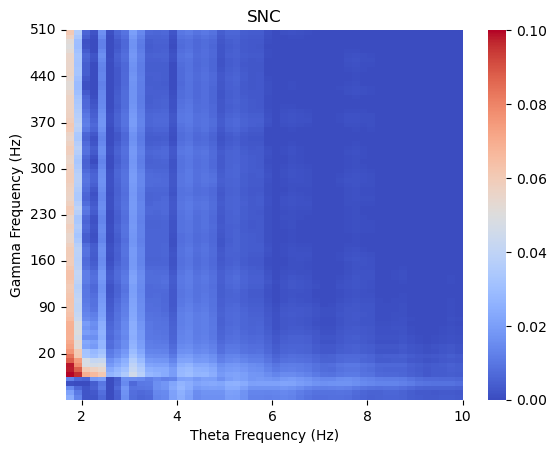

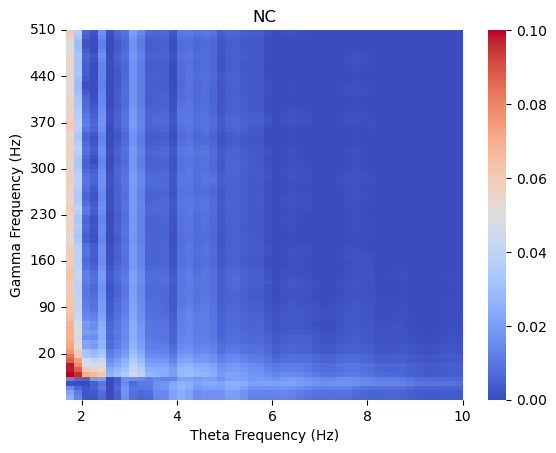

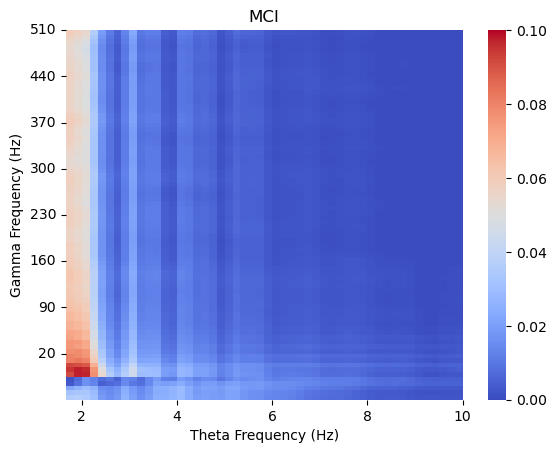

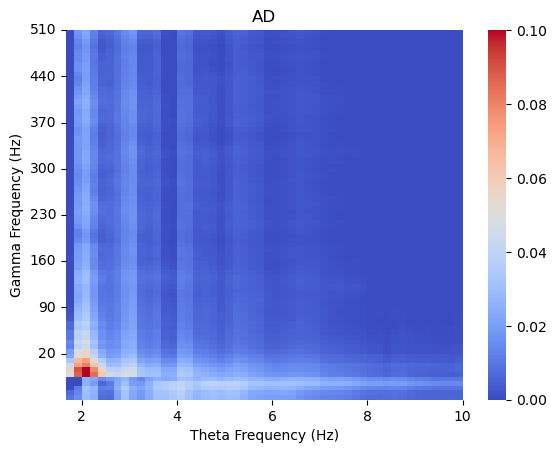

In [44]:
SNC = 10
NC = 10+16
MCI = 10+16+35


diff_collect = collect_left - collect_right

SNC_diff = np.mean(diff_collect[:,:,:SNC], axis=2)
NC_diff = np.mean(diff_collect[:,:,:SNC], axis=2) 
MCI_diff = np.mean(diff_collect[:,:,NC:MCI], axis=2)
AD_diff = np.mean(diff_collect[:,:,MCI:], axis=2)


# SNC_diff = np.mean(collect_left[:,:,:SNC], axis=2) - np.mean(collect_right[:,:,:SNC], axis=2)
# NC_diff = np.mean(collect_left[:,:,SNC:NC], axis=2) - np.mean(collect_right[:,:,SNC:NC], axis=2)
# MCI_diff = np.mean(collect_left[:,:,NC:MCI], axis=2) - np.mean(collect_right[:,:,NC:MCI], axis=2)
# AD_diff = np.mean(collect_left[:,:,MCI:], axis=2) - np.mean(collect_right[:,:,MCI:], axis=2)

title = ['SNC', 'NC', 'MCI', 'AD']

def pac_plot(matrix, title, ):
    fig, ax = plt.subplots()
    ax = sns.heatmap(matrix.T, vmin=0, vmax=0.1, cmap='coolwarm')
    ax.invert_yaxis()
    plt.title(title)
    plt.xlabel('Theta Frequency (Hz)')
    ax.set_xticks(np.arange(2, 51, 12))
    ax.set_xticklabels(np.arange(2, 11, 2), rotation=0)
    plt.ylabel('Gamma Frequency (Hz)')
    ax.set_yticks(np.arange(10,81,10))
    ax.set_yticklabels(np.arange(20,575,70), rotation=0)
    plt.show()

summary = [SNC_diff, NC_diff, MCI_diff, AD_diff]

for index, i in enumerate(summary):
    pac_plot(i, title[index])